## Imports

In [1]:
import os, glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

## Load Data

In [2]:
# Merge .csv files
joined_files = os.path.join('Data/Chicago/','Chicago-Crime*.csv')
print(joined_files)

# Return list of all joined files
joined_list = glob.glob(joined_files)
print(joined_list)

# # Concatenate dataframe
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)

Data/Chicago/Chicago-Crime*.csv
['Data/Chicago\\Chicago-Crime_2001.csv', 'Data/Chicago\\Chicago-Crime_2002.csv', 'Data/Chicago\\Chicago-Crime_2003.csv', 'Data/Chicago\\Chicago-Crime_2004.csv', 'Data/Chicago\\Chicago-Crime_2005.csv', 'Data/Chicago\\Chicago-Crime_2006.csv', 'Data/Chicago\\Chicago-Crime_2007.csv', 'Data/Chicago\\Chicago-Crime_2008.csv', 'Data/Chicago\\Chicago-Crime_2009.csv', 'Data/Chicago\\Chicago-Crime_2010.csv', 'Data/Chicago\\Chicago-Crime_2011.csv', 'Data/Chicago\\Chicago-Crime_2012.csv', 'Data/Chicago\\Chicago-Crime_2013.csv', 'Data/Chicago\\Chicago-Crime_2014.csv', 'Data/Chicago\\Chicago-Crime_2015.csv', 'Data/Chicago\\Chicago-Crime_2016.csv', 'Data/Chicago\\Chicago-Crime_2017.csv', 'Data/Chicago\\Chicago-Crime_2018.csv', 'Data/Chicago\\Chicago-Crime_2019.csv', 'Data/Chicago\\Chicago-Crime_2020.csv', 'Data/Chicago\\Chicago-Crime_2021.csv', 'Data/Chicago\\Chicago-Crime_2022.csv', 'Data/Chicago\\Chicago-Crime_2023.csv']


In [3]:
# Confirm data loaded correctly
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7819943 entries, 0 to 7819942
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 611.5+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1427622,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,NaN,41.929707,-87.739828
1,1316324,01/01/2001 01:00:00 PM,THEFT,OVER $500,STREET,False,False,1513,15.0,NaN,41.869008,-87.773947
2,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.0,NaN,41.783892,-87.684841
3,1584605,01/01/2001 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.0,NaN,41.915639,-87.688701
4,1311503,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.0,NaN,41.931374,-87.648819


In [4]:
# Make column names lowercase
df.columns = df.columns.str.lower()

In [5]:
df['id'].value_counts().sum()

# Remove 'id' and 'ward' column
df = df.drop(columns=['id','ward'])
df.head()

,date,primary type,description,location description,arrest,domestic,beat,district,latitude,longitude
0,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,41.929707,-87.739828
1,01/01/2001 01:00:00 PM,THEFT,OVER $500,STREET,False,False,1513,15.0,41.869008,-87.773947
2,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.0,41.783892,-87.684841
3,01/01/2001 01:00:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.0,41.915639,-87.688701
4,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.0,41.931374,-87.648819


## Prepare Data for Time Series Analysis

In [6]:
# Create copy of original dataframe
df_ts = df.copy()

In [7]:
# Add 'total incident' column
df_ts['total incident'] = 1

In [8]:
df_ts['date'] = pd.to_datetime(df['date'])

In [9]:
df_ts.dtypes

date                    datetime64[ns]
primary type                    object
description                     object
location description            object
arrest                            bool
domestic                          bool
beat                             int64
district                       float64
latitude                       float64
longitude                      float64
total incident                   int64
dtype: object

In [10]:
df_ts.head()

,date,primary type,description,location description,arrest,domestic,beat,district,latitude,longitude,total incident
0,2001-01-01 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,41.929707,-87.739828,1
1,2001-01-01 13:00:00,THEFT,OVER $500,STREET,False,False,1513,15.0,41.869008,-87.773947,1
2,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.0,41.783892,-87.684841,1
3,2001-01-01 01:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.0,41.915639,-87.688701,1
4,2001-01-01 01:00:00,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.0,41.931374,-87.648819,1


In [11]:
# Set 'date' column as index
df_ts = df_ts.set_index('date')
df_ts.head()

,primary type,description,location description,arrest,domestic,beat,district,latitude,longitude,total incident
date,,,,,,,,,,
2001-01-01 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,41.929707,-87.739828,1
2001-01-01 13:00:00,THEFT,OVER $500,STREET,False,False,1513,15.0,41.869008,-87.773947,1
2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.0,41.783892,-87.684841,1
2001-01-01 01:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.0,41.915639,-87.688701,1
2001-01-01 01:00:00,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.0,41.931374,-87.648819,1


In [12]:
# Check for missing values
df_ts.isna().sum()

primary type                0
description                 0
location description    10609
arrest                      0
domestic                    0
beat                        0
district                   47
latitude                87672
longitude               87672
total incident              0
dtype: int64

In [13]:
df_ts['location description'].value_counts()

STREET                    2036937
RESIDENCE                 1310234
APARTMENT                  885985
SIDEWALK                   730602
OTHER                      270018
                           ...   
POOLROOM                        1
JUNK YARD/GARBAGE DUMP          1
LAGOON                          1
ROOF                            1
CLEANERS/LAUNDROMAT             1
Name: location description, Length: 216, dtype: int64

In [14]:
# Creating a list of dataframe columns
columns = list(df_ts)

# For loop to iterate over column and pull value counts
for col in columns:
    if df_ts[col].dtypes == 'object' or 'bool': 
        print('Column: ',col)
        print (df_ts[col].value_counts(),'\n')

Column:  primary type
THEFT                                1649683
BATTERY                              1429194
CRIMINAL DAMAGE                       891283
NARCOTICS                             748277
ASSAULT                               510463
OTHER OFFENSE                         485627
BURGLARY                              425402
MOTOR VEHICLE THEFT                   379255
DECEPTIVE PRACTICE                    347433
ROBBERY                               293539
CRIMINAL TRESPASS                     214924
WEAPONS VIOLATION                     107650
PROSTITUTION                           69857
OFFENSE INVOLVING CHILDREN             56031
PUBLIC PEACE VIOLATION                 52454
SEX OFFENSE                            30885
CRIM SEXUAL ASSAULT                    27611
INTERFERENCE WITH PUBLIC OFFICER       18464
LIQUOR LAW VIOLATION                   14934
GAMBLING                               14619
ARSON                                  13335
HOMICIDE                         

In [15]:
# Correct errors in 'primary type' column
df_ts['primary type'] = df_ts['primary type'].replace({'CRIM SEXUAL ASSAULT':'SEXUAL ASSUALT',
                                                       'CRIMINAL SEXUAL ASSAULT':'SEXUAL ASSUALT',
                                                       'SEX OFFENSE':'OTHER SEX OFFENSE',
                                                       'OTHER NARCOTIC VIOLATION':'NARCOTICS',
                                                       'NON - CRIMINAL':'NON-CRIMINAL',
                                                       'NON-CRIMINAL (SUBJECT SPECIFIED)':'NON-CRIMINAL'})
df_ts['primary type'].value_counts()

THEFT                                1649683
BATTERY                              1429194
CRIMINAL DAMAGE                       891283
NARCOTICS                             748426
ASSAULT                               510463
OTHER OFFENSE                         485627
BURGLARY                              425402
MOTOR VEHICLE THEFT                   379255
DECEPTIVE PRACTICE                    347433
ROBBERY                               293539
CRIMINAL TRESPASS                     214924
WEAPONS VIOLATION                     107650
PROSTITUTION                           69857
OFFENSE INVOLVING CHILDREN             56031
PUBLIC PEACE VIOLATION                 52454
SEXUAL ASSUALT                         34546
OTHER SEX OFFENSE                      30885
INTERFERENCE WITH PUBLIC OFFICER       18464
LIQUOR LAW VIOLATION                   14934
GAMBLING                               14619
ARSON                                  13335
HOMICIDE                               12651
KIDNAPPING

In [16]:
# Change dtypes of columns
df_ts = df_ts.astype({'primary type':object, 'description':object,
                      'location description':object})
df_ts.dtypes

primary type             object
description              object
location description     object
arrest                     bool
domestic                   bool
beat                      int64
district                float64
latitude                float64
longitude               float64
total incident            int64
dtype: object

In [17]:
# Rename 'description' column to 'crime description'
df_ts.rename(columns={'description':'crime description'})

,primary type,crime description,location description,arrest,domestic,beat,district,latitude,longitude,total incident
date,,,,,,,,,,
2001-01-01 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2521,25.0,41.929707,-87.739828,1
2001-01-01 13:00:00,THEFT,OVER $500,STREET,False,False,1513,15.0,41.869008,-87.773947,1
2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.0,41.783892,-87.684841,1
2001-01-01 01:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,1434,14.0,41.915639,-87.688701,1
2001-01-01 01:00:00,SEXUAL ASSUALT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.0,41.931374,-87.648819,1
...,...,...,...,...,...,...,...,...,...,...
2023-06-09 12:50:00,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,1134,11.0,41.869492,-87.710643,1
2023-06-09 12:55:00,THEFT,FROM BUILDING,APARTMENT,False,False,1722,17.0,41.959276,-87.727781,1
2023-06-09 00:55:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1531,15.0,41.896804,-87.749613,1


In [18]:
# Change inconsistent values in 'description column'
desc_alpha = df_ts['description'].unique()
desc_alpha.sort()
desc_alpha

array(['$300 AND UNDER', '$500 AND UNDER',
       'ABUSE / NEGLECT - CARE FACILITY', 'ABUSE/NEGLECT: CARE FACILITY',
       'ADULTRY', 'AGG CRIM SEX ABUSE FAM MEMBER',
       'AGG CRIMINAL SEXUAL ABUSE', 'AGG PO HANDS ETC SERIOUS INJ',
       'AGG PO HANDS NO/MIN INJURY', 'AGG PRO EMP HANDS SERIOUS INJ',
       'AGG PRO.EMP: HANDGUN', 'AGG PRO.EMP: OTHER DANG WEAPON',
       'AGG PRO.EMP: OTHER FIREARM', 'AGG PRO.EMP:KNIFE/CUTTING INST',
       'AGG RIT MUT: HANDS/FIST/FEET NO/MINOR INJURY',
       'AGG RIT MUT: HANDS/FIST/FEET SERIOUS INJURY',
       'AGG RITUAL MUT:HANDGUN', 'AGG RITUAL MUT:KNIFE/CUTTING I',
       'AGG RITUAL MUT:OTH DANG WEAPON', 'AGG SEX ASSLT OF CHILD FAM MBR',
       'AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY',
       'AGG. PROTECTED EMPLOYEE - HANDS, FISTS, FEET, SERIOUS INJURY',
       'AGG. RITUAL MUTILATION - HANDS, FISTS, FEET, SERIOUS INJURY',
       'AGG: FINANCIAL ID THEFT', 'AGG: HANDS/FIST/FEET NO/MINOR INJURY',
       'AGG: HANDS/FIST

In [19]:
df_ts.loc[df_ts['description'].str.contains('AGG CRIM SEX ABUSE'),
          'description'] = 'AGG CRIMINAL SEXUAL ABUSE'
df_ts.loc[df_ts['description'].str.contains('AGG PO HANDS SERIOUS'),
          'description'] = 'AGG PRO HANDS SERIOUS INJURY'
df_ts.loc[df_ts['description'].str.contains('AGG PRO EMP'),
          'description'] = 'AGG PRO EMP'
df_ts.loc[df_ts['description'].str.contains('AGG HANDS/FIST/FEET NO/MINOR INJURY'),
          'description'] = 'AGG HANDS/FIST/FEET NO/MINOR INJURY'
df_ts.loc[df_ts['description'].str.contains('CHILD ABDUCTION'),
          'description'] = 'CHILD ABDUCTION'

##  Question 1: Comparing Police Districts: 
- Which district has the most crimes?
- Which has the least?

In [21]:
df_ts['district'].value_counts()

8.0     525386
11.0    501665
6.0     457334
7.0     451929
25.0    444865
4.0     443914
3.0     396573
12.0    387717
9.0     381976
2.0     370332
19.0    351107
18.0    350983
5.0     346463
10.0    336890
15.0    334952
1.0     316512
14.0    302489
16.0    261844
22.0    256307
24.0    236332
17.0    225729
20.0    138350
31.0       243
21.0         4
Name: district, dtype: int64

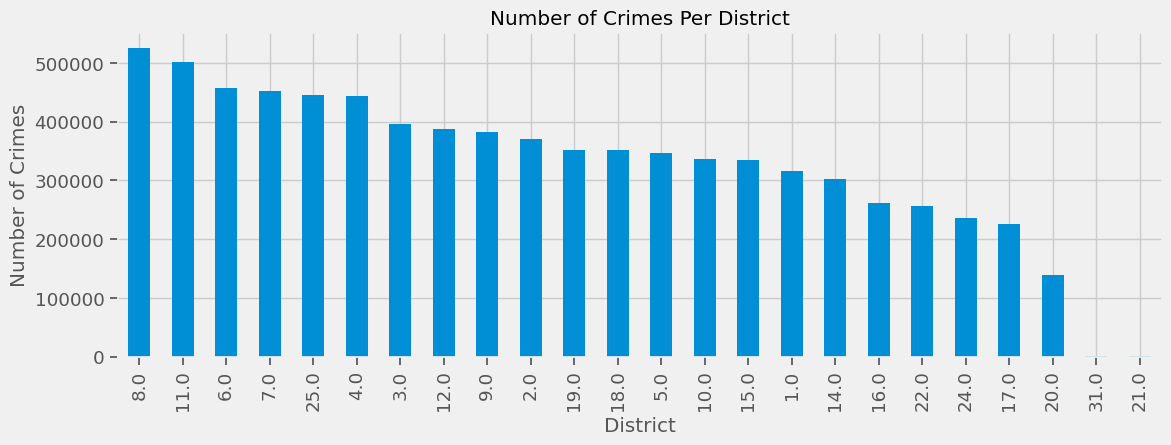

In [22]:
df_ts.district.value_counts().plot(kind='bar')
plt.title('Number of Crimes Per District')
plt.ylabel('Number of Crimes')
plt.xlabel('District');

- District 8 has the most number of crimes overall: 525,386
- District 21 has the least number of crimes overall: 4

## Question 2: Crimes Across the Years:
 - Is the total number of crimes increasing or decreasing across the years?
 - Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [23]:
# Resample to yearly
df_year  = df_ts.groupby('primary type').resample('AS').sum()['total incident'].reset_index()
df_year

,primary type,date,total incident
0,ARSON,2001-01-01,1011
1,ARSON,2002-01-01,1032
2,ARSON,2003-01-01,955
3,ARSON,2004-01-01,778
4,ARSON,2005-01-01,691
...,...,...,...
695,WEAPONS VIOLATION,2019-01-01,6339
696,WEAPONS VIOLATION,2020-01-01,8432
697,WEAPONS VIOLATION,2021-01-01,8980
698,WEAPONS VIOLATION,2022-01-01,8766


In [24]:
# Pivot the result so datetime is index and crime is columns
years_ts = df_year.pivot(index='date',columns='primary type')
years_ts.head()

total incident                             \
primary type          ARSON  ASSAULT  BATTERY BURGLARY   
date                                                     
2001-01-01           1011.0  31384.0  93460.0  26014.0   
2002-01-01           1032.0  31523.0  94153.0  25623.0   
2003-01-01            955.0  29477.0  88379.0  25157.0   
2004-01-01            778.0  28850.0  87136.0  24564.0   
2005-01-01            691.0  27067.0  83964.0  25503.0   

                                                                \
primary type CONCEALED CARRY LICENSE VIOLATION CRIMINAL DAMAGE   
date                                                             
2001-01-01                                 1.0         55858.0   
2002-01-01                                 0.0         55941.0   
2003-01-01                                 0.0         55011.0   
2004-01-01                                 0.0         53164.0   
2005-01-01                                 0.0         54548.0   

                                                                              \
primary type CRIMINAL TRESPASS DECEPTIVE PRACTICE DOMESTIC VIOLENCE GAMBLING   
date                                                                           
2001-01-01             13241.0            14947.0               1.0    934.0   
2002-01-01             13880.0            13731.0               NaN    971.0   
2003-01-01             14807.0            13459.0               NaN   1088.0   
2004-01-01             15913.0            13255.0               NaN   1122.0   
2005-01-01             16655.0            13590.0               NaN   1078.0   

              ...                                                  \
primary type  ... OTHER SEX OFFENSE PROSTITUTION PUBLIC INDECENCY   
date          ...                                                   
2001-01-01    ...            2239.0       6026.0              9.0   
2002-01-01    ...            2173.0       6408.0              8.0   
2003-01-01    ...            2078.0       6214.0              6.0   
2004-01-01    ...            1805.0       7476.0              9.0   
2005-01-01    ...            1816.0       6124.0              4.0   

                                                                       \
primary type PUBLIC PEACE VIOLATION RITUALISM  ROBBERY SEXUAL ASSUALT   
date                                                                    
2001-01-01                   2750.0       8.0  18441.0         1809.0   
2002-01-01                   2457.0       2.0  18523.0         1834.0   
2003-01-01                   2430.0       2.0  17332.0         1611.0   
2004-01-01                   2495.0       1.0  15978.0         1579.0   
2005-01-01                   2730.0       2.0  16047.0         1558.0   

                                                  
primary type STALKING    THEFT WEAPONS VIOLATION  
date                                              
2001-01-01      204.0  99277.0            4277.0  
2002-01-01      200.0  98332.0            4281.0  
2003-01-01      247.0  98876.0            4211.0  
2004-01-01      215.0  95463.0            4298.0  
2005-01-01      192.0  85684.0            4106.0  

[5 rows x 32 columns]

In [25]:
years_ts.tail()

total incident                             \
primary type          ARSON  ASSAULT  BATTERY BURGLARY   
date                                                     
2019-01-01            376.0  20620.0  49518.0   9639.0   
2020-01-01            588.0  18254.0  41512.0   8757.0   
2021-01-01            529.0  20342.0  40458.0   6658.0   
2022-01-01            422.0  20788.0  40892.0   7589.0   
2023-01-01            213.0   9366.0  18335.0   3160.0   

                                                                \
primary type CONCEALED CARRY LICENSE VIOLATION CRIMINAL DAMAGE   
date                                                             
2019-01-01                               217.0         26681.0   
2020-01-01                               148.0         24878.0   
2021-01-01                               173.0         25094.0   
2022-01-01                               177.0         27239.0   
2023-01-01                                77.0         12373.0   

                                                                              \
primary type CRIMINAL TRESPASS DECEPTIVE PRACTICE DOMESTIC VIOLENCE GAMBLING   
date                                                                           
2019-01-01              6818.0            19015.0               NaN    142.0   
2020-01-01              4177.0            18268.0               NaN     25.0   
2021-01-01              3406.0            17275.0               NaN     13.0   
2022-01-01              4222.0            16244.0               NaN      9.0   
2023-01-01              2060.0             6878.0               NaN      3.0   

              ...                                                  \
primary type  ... OTHER SEX OFFENSE PROSTITUTION PUBLIC INDECENCY   
date          ...                                                   
2019-01-01    ...            1362.0        681.0             11.0   
2020-01-01    ...             963.0        277.0              9.0   
2021-01-01    ...            1088.0         95.0              4.0   
2022-01-01    ...            1213.0        283.0              5.0   
2023-01-01    ...             554.0        107.0              3.0   

                                                                               \
primary type PUBLIC PEACE VIOLATION RITUALISM ROBBERY SEXUAL ASSUALT STALKING   
date                                                                            
2019-01-01                   1520.0       0.0  7994.0         1653.0    226.0   
2020-01-01                   1271.0       1.0  7855.0         1238.0    203.0   
2021-01-01                    602.0       NaN  7917.0         1499.0    370.0   
2022-01-01                    710.0       NaN  8965.0         1549.0    442.0   
2023-01-01                    369.0       NaN  3865.0          642.0    195.0   

                                         
primary type    THEFT WEAPONS VIOLATION  
date                                     
2019-01-01    62491.0            6339.0  
2020-01-01    41319.0            8432.0  
2021-01-01    40792.0            8980.0  
2022-01-01    54789.0            8766.0  
2023-01-01    22739.0            3745.0  

[5 rows x 32 columns]

In [26]:
years_ts.columns = years_ts.columns.droplevel(0)
years_ts.columns

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIMINAL DAMAGE',
       'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE',
       'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON-CRIMINAL', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN',
       'OTHER OFFENSE', 'OTHER SEX OFFENSE', 'PROSTITUTION',
       'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY',
       'SEXUAL ASSUALT', 'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object', name='primary type')

In [27]:
# Substract to get delta crmes
delta_crime_yrs = years_ts.loc['2023-01-01'] - years_ts.loc['2001-01-01']
delta_crime_yrs.round(2)

primary type
ARSON                                 -798.0
ASSAULT                             -22018.0
BATTERY                             -75125.0
BURGLARY                            -22854.0
CONCEALED CARRY LICENSE VIOLATION       76.0
CRIMINAL DAMAGE                     -43485.0
CRIMINAL TRESPASS                   -11181.0
DECEPTIVE PRACTICE                   -8069.0
DOMESTIC VIOLENCE                        NaN
GAMBLING                              -931.0
HOMICIDE                              -410.0
HUMAN TRAFFICKING                        NaN
INTERFERENCE WITH PUBLIC OFFICER      -147.0
INTIMIDATION                          -151.0
KIDNAPPING                            -878.0
LIQUOR LAW VIOLATION                 -1549.0
MOTOR VEHICLE THEFT                 -14877.0
NARCOTICS                           -48441.0
NON-CRIMINAL                             NaN
OBSCENITY                               -2.0
OFFENSE INVOLVING CHILDREN           -1401.0
OTHER OFFENSE                       -23045

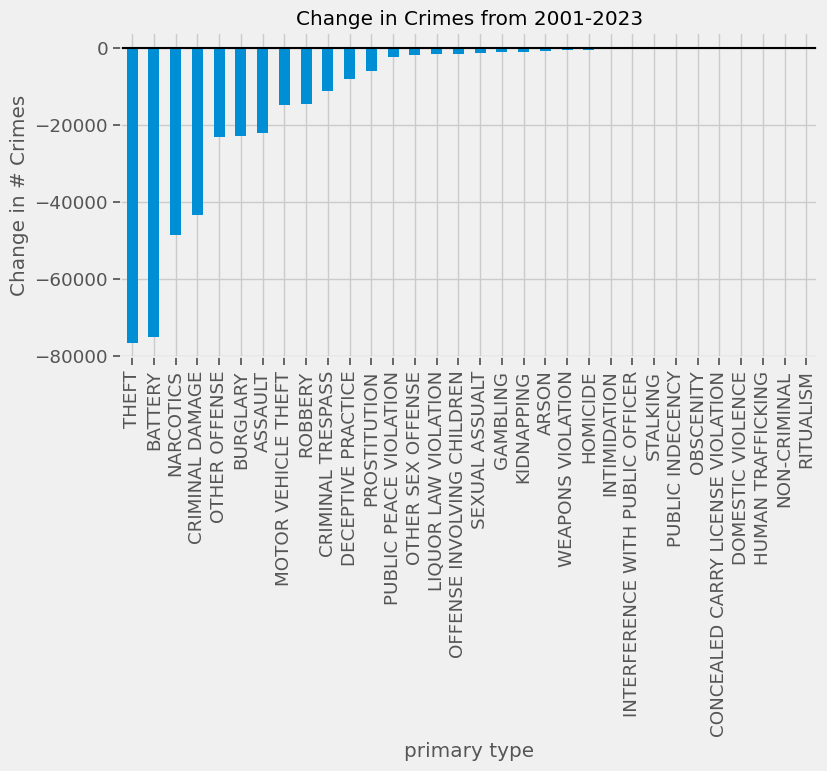

In [28]:
ax = delta_crime_yrs.sort_values().plot(kind='bar',figsize=(8,4),
                                       ylabel='Change in # Crimes',
                                       title='Change in Crimes from 2001-2023')
ax.axhline(0,color='k');

> Over the years crimes have decreased overall. There is not any crimes that are trending in the opposite direction 

## Comparing Months:
- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [29]:
# Resample to monthly
df_month  = df_ts.groupby('primary type').resample('MS').sum()['total incident'].reset_index()
df_month

,primary type,date,total incident
0,ARSON,2001-01-01,67
1,ARSON,2001-02-01,57
2,ARSON,2001-03-01,93
3,ARSON,2001-04-01,89
4,ARSON,2001-05-01,94
...,...,...,...
8184,WEAPONS VIOLATION,2023-02-01,641
8185,WEAPONS VIOLATION,2023-03-01,631
8186,WEAPONS VIOLATION,2023-04-01,688
8187,WEAPONS VIOLATION,2023-05-01,821


In [30]:
# Pivot the result so datetime is index and crime is columns
month_ts = df_month.pivot(index='date',columns='primary type')
month_ts.head()

total incident                           \
primary type          ARSON ASSAULT BATTERY BURGLARY   
date                                                   
2001-01-01             67.0  2123.0  6527.0   1934.0   
2001-02-01             57.0  2029.0  6041.0   1666.0   
2001-03-01             93.0  2824.0  7662.0   1832.0   
2001-04-01             89.0  2746.0  8328.0   1932.0   
2001-05-01             94.0  2903.0  8887.0   1997.0   

                                                                \
primary type CONCEALED CARRY LICENSE VIOLATION CRIMINAL DAMAGE   
date                                                             
2001-01-01                                 NaN          3966.0   
2001-02-01                                 NaN          3665.0   
2001-03-01                                 NaN          4617.0   
2001-04-01                                 NaN          4922.0   
2001-05-01                                 1.0          4756.0   

                                                                              \
primary type CRIMINAL TRESPASS DECEPTIVE PRACTICE DOMESTIC VIOLENCE GAMBLING   
date                                                                           
2001-01-01              1192.0             1398.0               1.0     44.0   
2001-02-01              1063.0             1163.0               NaN     37.0   
2001-03-01              1141.0             1313.0               NaN     55.0   
2001-04-01              1133.0             1199.0               NaN     79.0   
2001-05-01              1067.0             1261.0               NaN     94.0   

              ...                                                  \
primary type  ... OTHER SEX OFFENSE PROSTITUTION PUBLIC INDECENCY   
date          ...                                                   
2001-01-01    ...             218.0        563.0              NaN   
2001-02-01    ...             149.0        426.0              1.0   
2001-03-01    ...             184.0        550.0              0.0   
2001-04-01    ...             169.0        564.0              1.0   
2001-05-01    ...             227.0        503.0              1.0   

                                                                               \
primary type PUBLIC PEACE VIOLATION RITUALISM ROBBERY SEXUAL ASSUALT STALKING   
date                                                                            
2001-01-01                    161.0       2.0  1396.0          166.0     26.0   
2001-02-01                    173.0       0.0  1159.0          135.0     13.0   
2001-03-01                    267.0       2.0  1399.0          153.0     17.0   
2001-04-01                    229.0       1.0  1341.0          134.0     29.0   
2001-05-01                    239.0       1.0  1491.0          157.0     12.0   

                                        
primary type   THEFT WEAPONS VIOLATION  
date                                    
2001-01-01    7867.0             337.0  
2001-02-01    6669.0             301.0  
2001-03-01    7766.0             345.0  
2001-04-01    7702.0             321.0  
2001-05-01    8420.0             390.0  

[5 rows x 32 columns]

In [31]:
month_ts.columns = month_ts.columns.droplevel(0)
month_ts.columns

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIMINAL DAMAGE',
       'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE',
       'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON-CRIMINAL', 'OBSCENITY', 'OFFENSE INVOLVING CHILDREN',
       'OTHER OFFENSE', 'OTHER SEX OFFENSE', 'PROSTITUTION',
       'PUBLIC INDECENCY', 'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY',
       'SEXUAL ASSUALT', 'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object', name='primary type')

In [32]:
# Add column to get month number
month_ts['month'] = month_ts.index.month
month_ts

primary type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,...,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEXUAL ASSUALT,STALKING,THEFT,WEAPONS VIOLATION,month
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,67.0,2123.0,6527.0,1934.0,NaN,3966.0,1192.0,1398.0,1.0,44.0,...,563.0,NaN,161.0,2.0,1396.0,166.0,26.0,7867.0,337.0,1
2001-02-01,57.0,2029.0,6041.0,1666.0,NaN,3665.0,1063.0,1163.0,NaN,37.0,...,426.0,1.0,173.0,0.0,1159.0,135.0,13.0,6669.0,301.0,2
2001-03-01,93.0,2824.0,7662.0,1832.0,NaN,4617.0,1141.0,1313.0,NaN,55.0,...,550.0,0.0,267.0,2.0,1399.0,153.0,17.0,7766.0,345.0,3
2001-04-01,89.0,2746.0,8328.0,1932.0,NaN,4922.0,1133.0,1199.0,NaN,79.0,...,564.0,1.0,229.0,1.0,1341.0,134.0,29.0,7702.0,321.0,4
2001-05-01,94.0,2903.0,8887.0,1997.0,1.0,4756.0,1067.0,1261.0,NaN,94.0,...,503.0,1.0,239.0,1.0,1491.0,157.0,12.0,8420.0,390.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,33.0,1491.0,3050.0,540.0,14.0,1935.0,382.0,1291.0,NaN,0.0,...,15.0,1.0,62.0,NaN,582.0,107.0,32.0,3799.0,641.0,2
2023-03-01,29.0,1752.0,3399.0,567.0,17.0,2320.0,440.0,1441.0,NaN,1.0,...,7.0,0.0,66.0,NaN,684.0,116.0,36.0,4430.0,631.0,3
2023-04-01,36.0,1805.0,3598.0,591.0,12.0,2426.0,362.0,1333.0,NaN,0.0,...,5.0,0.0,82.0,NaN,751.0,120.0,36.0,4292.0,688.0,4


In [33]:
# Groupby month number
month_grp = month_ts.groupby('month').sum()
month_grp

primary type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,...,OTHER SEX OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEXUAL ASSUALT,STALKING,THEFT,WEAPONS VIOLATION
month,,,,,,,,,,,,,,,,,,,,,
1,963.0,36519.0,104465.0,33316.0,82.0,64961.0,18856.0,31606.0,1.0,361.0,...,2804.0,6446.0,8.0,3553.0,3.0,24301.0,3226.0,424.0,127727.0,8674.0
2,840.0,34907.0,96649.0,26192.0,83.0,57363.0,17061.0,26654.0,0.0,389.0,...,2106.0,5674.0,16.0,3462.0,1.0,17853.0,2435.0,345.0,108748.0,7041.0
3,1140.0,43462.0,121267.0,30639.0,94.0,74192.0,19174.0,30049.0,0.0,745.0,...,2462.0,6148.0,9.0,4735.0,3.0,20874.0,2728.0,434.0,128162.0,8801.0
4,1134.0,43836.0,122096.0,31963.0,90.0,77529.0,18099.0,28993.0,0.0,1238.0,...,2387.0,6039.0,13.0,4423.0,1.0,21658.0,2692.0,428.0,129932.0,9096.0
5,1280.0,50453.0,139613.0,36672.0,105.0,82260.0,18767.0,28649.0,0.0,1637.0,...,2926.0,6094.0,24.0,5574.0,1.0,24477.0,3082.0,434.0,142103.0,10759.0
6,1255.0,47872.0,137090.0,36137.0,97.0,79648.0,17594.0,28567.0,0.0,1875.0,...,2952.0,5586.0,22.0,5000.0,0.0,24595.0,3141.0,426.0,144743.0,9626.0
7,1350.0,47900.0,136814.0,39279.0,95.0,83395.0,18029.0,28513.0,0.0,1964.0,...,3050.0,5875.0,13.0,4721.0,1.0,27243.0,3279.0,428.0,159062.0,9788.0
8,1182.0,46455.0,128731.0,40595.0,96.0,81709.0,18563.0,29164.0,0.0,2219.0,...,2883.0,6284.0,25.0,4397.0,3.0,27394.0,3181.0,405.0,158938.0,9887.0
9,1131.0,45426.0,122339.0,38389.0,118.0,75471.0,17914.0,27899.0,0.0,1799.0,...,2773.0,5877.0,19.0,4884.0,3.0,26166.0,3001.0,395.0,145604.0,9435.0


In [34]:
# Get total crimes for each month number over the years
month_total = month_grp.agg('sum', axis=1)
month_total.sort_values(ascending=False)

month
7     717159.0
8     710355.0
5     704412.0
6     687963.0
10    676191.0
9     668170.0
3     650083.0
4     647472.0
1     622011.0
11    608893.0
12    579670.0
2     547564.0
dtype: float64

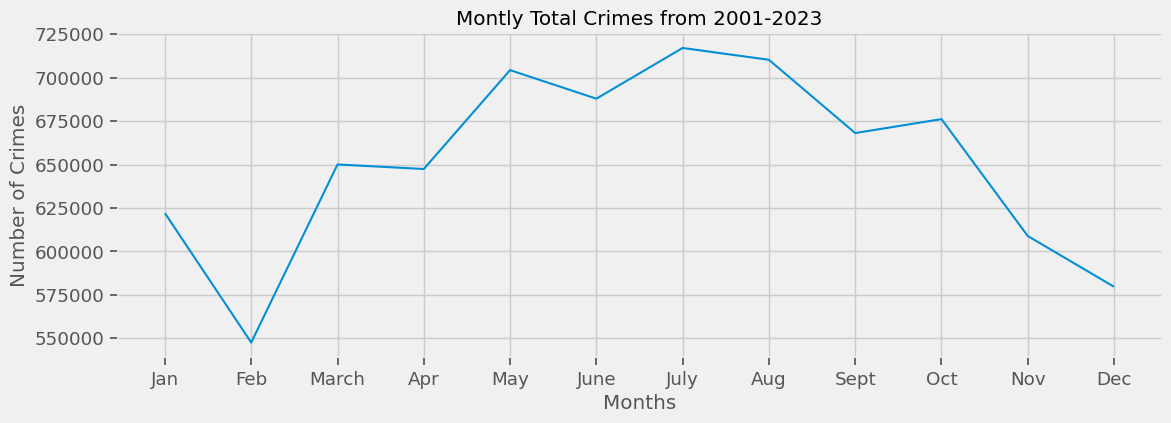

In [35]:
# Plot crimes by month from 2001-2023
labels = ['Jan','Feb','March','Apr','May','June','July','Aug','Sept','Oct','Nov',
         'Dec']
x = [1,2,3,4,5,6,7,8,9,10,11,12]

month_total.plot()
plt.title('Montly Total Crimes from 2001-2023')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')
plt.xticks(ticks=x, labels=labels);

- July and August are the months with the most crimes that occur, 717,159 and 710,355 crimes occurring respectively
- February and December are the months with the least crimes, 547,564 and 579,670 crimes occurring respectively